# Stock Price Prediction USing ML

# Importing the Packages

In [32]:
import numpy as np
import pandas as pd
import os

In [33]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import math

# Data Exploration

In [34]:
df = pd.read_csv('data/Tesla.csv')

# Data Processing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [37]:
df.shape

(1692, 6)

# Visualization

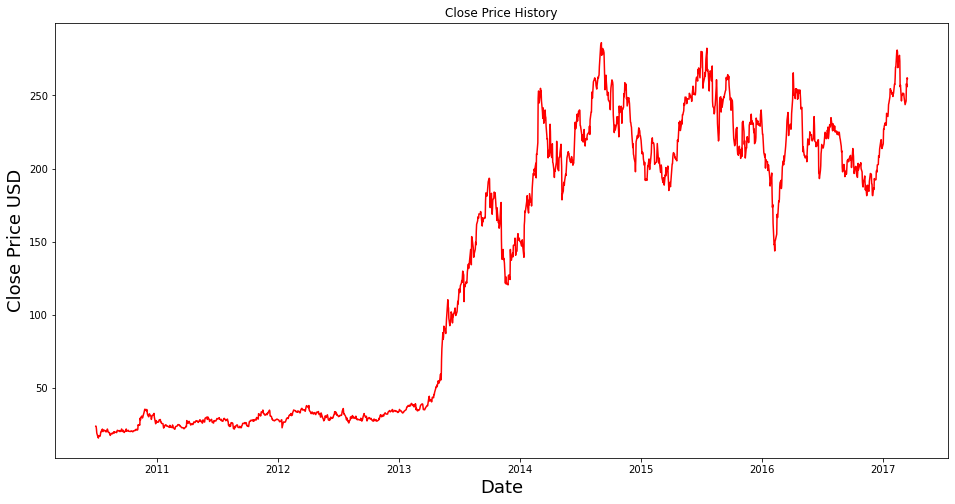

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()
plt.savefig('static/1.png')

In [39]:
data = df.filter(['Close'])
dataset = data.values

In [40]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1354

# DAta Scaling

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

# Feature Selection 

# DAta Splitting

In [42]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [43]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.01391355415474397]



In [44]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))
x_train.shape

(1294, 60)

# Machine Learning Models

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [47]:
LR.score(x_train,y_train)

0.9979850803968042

# Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
Rf.score(x_train,y_train)

0.9996862171080603

# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
DT.score(x_train,y_train)

1.0

# Support Vector Regression

In [52]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(x_train,y_train)

SVR()

In [53]:
SVR.score(x_train,y_train)

0.9668323707800303

# Lasso Regression

In [54]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train)

Lasso(alpha=0.1)

In [55]:
clf.score(x_train,y_train)

0.2900201259854348

# Ridge Regressor

In [56]:
from sklearn.linear_model import Ridge
clf1 = Ridge()
clf1.fit(x_train,y_train)

Ridge()

In [57]:
clf1.score(x_train,y_train)

0.9969095551251598

# Model Accuracy Comparsion

In [58]:
classifier = ('Linear Regression','Random Forest Regressor','Decision Tree Regressor','SVR','Lasso Regression','Ridge Regression')
y_pos = np.arange(len(classifier))
print(y_pos)
score = [LR.score(x_train,y_train),Rf.score(x_train,y_train),DT.score(x_train,y_train),SVR.score(x_train,y_train),clf.score(x_train,y_train),clf1.score(x_train,y_train)]
print(score)

[0 1 2 3 4 5]
[0.9979850803968042, 0.9996862171080603, 1.0, 0.9668323707800303, 0.2900201259854348, 0.9969095551251598]


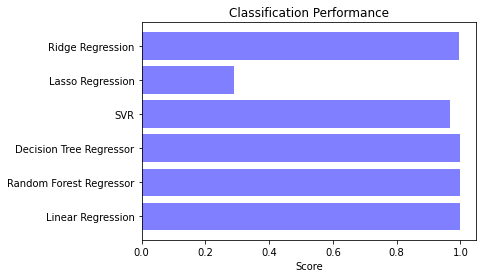

<Figure size 432x288 with 0 Axes>

In [59]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()
plt2.savefig('static/acc.png')